<a href="https://colab.research.google.com/github/sekunder/NMA_Project/blob/master/RSA_orientations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Representational Similarity Analyses

In [1]:
#@title Load packages
import os, requests
import numpy as np
import pandas as pd


In [2]:
#@title Data file access
# give google colab access to your drive
from google.colab import drive
drive.mount('/content/drive')

wd="drive/My Drive/data/"

all_fnames = ['gratings_noisy_GT1_2019_04_08_1.npy', \
          'gratings_static_GT1_2019_04_17_1.npy',\
          'minnie_GT1_2019_04_29_2.npy',\
          'gratings_drifting_GT1_2019_04_12_1.npy',\
          'gratings_local_GT1_2019_04_27_2.npy']
fname_keys = ['noisy', 'static', 'minnie', 'drifting', 'local']


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#@title Data loading
# load this mouse's data
dats={}
# which files do you want to load?
idx = [1,2]#range(len(fname_keys))
# load each file and save it in a new array
for ind in idx:
  dats[fname_keys[ind]] = np.load(os.path.join(wd, all_fnames[ind]), allow_pickle=True).item()


In [52]:
from sklearn.metrics import pairwise, pairwise_distances
pairwise_distances(rdm, metric="pearson")

ValueError: ignored

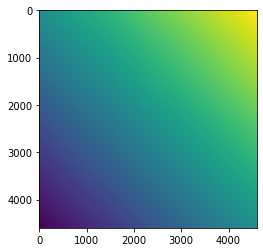

In [79]:
from numpy.matlib import repmat


istim_mat = repmat(istim_ordered_static, len(istim_ordered_static), 1)
from matplotlib import pyplot as plt
plt.imshow(istim_mat - istim_mat.T)

In [62]:
print(istim_ordered_static.reshape(len(istim_ordered_static),1) @ -istim_ordered_static.reshape(1,len(istim_ordered_static)))

[[-3.71074853e-07 -4.37765008e-07 -1.52478362e-06 ... -3.82179704e-03
  -3.82209780e-03 -3.82698432e-03]
 [-4.37765008e-07 -5.16440822e-07 -1.79882012e-06 ... -4.50865639e-03
  -4.50901122e-03 -4.51477594e-03]
 [-1.52478362e-06 -1.79882012e-06 -6.26548812e-06 ... -1.57041456e-02
  -1.57053815e-02 -1.57254606e-02]
 ...
 [-3.82179704e-03 -4.50865639e-03 -1.57041456e-02 ... -3.93616879e+01
  -3.93647856e+01 -3.94151131e+01]
 [-3.82209780e-03 -4.50901122e-03 -1.57053815e-02 ... -3.93647856e+01
  -3.93678836e+01 -3.94182150e+01]
 [-3.82698432e-03 -4.51477594e-03 -1.57254606e-02 ... -3.94151131e+01
  -3.94182150e+01 -3.94686108e+01]]


In [ ]:
# from sklearn.metrics import pairwise_distances
# def make_rdm(dat):
#   n_cond = len(dat['istim'])
#   stim_order = np.argsort(dat['istim'])
#   istim_ordered = dat['istim'][stim_order]
#   sresp_ordered = dat['sresp'][:,stim_order]
#   rdm = pairwise_distances(sresp_ordered.T, metric='correlation')
#   rdm_lt = rdm[np.tril_indices(len(rdm), k=-1)] # extract the lower triangle
#   istim_diff = pairwise_distances(istim_ordered, metric='euclidean')
#   istim_diff_lt = istim_diff[np.tril_indices(len(istim_diff), k=-1)]
#   return rdm_lt, istim_ordered

In [117]:
def make_rdm(dat):
  n_cond = len(dat['istim'])
  stim_order = np.argsort(dat['istim'])
  istim_ordered = dat['istim'][stim_order]
  sresp_ordered = dat['sresp'][:,stim_order]
  rdm = 1 - np.corrcoef(sresp_ordered.T)
  rdm_lt = rdm[np.tril_indices(len(rdm), k=-1)] # extract the lower triangle

  # istim_rep = repmat(istim_ordered, len(istim_ordered), 1)
  # istim_mat = istim_rep - istim_rep.T
  # stim_lt = istim_mat[np.tril_indices(len(istim_mat), k=-1)]
  
  return rdm, istim_ordered #rdm_lt, stim_lt

In [56]:
# def make_rdm(dat):
#   n_cond = len(dat['istim'])
#   stim_order = np.argsort(dat['istim'])
#   istim_ordered = dat['istim'][stim_order]
#   rdm = np.corrcoef()
#   rdm = np.zeros((n_cond, n_cond))
#   stim_rdm = np.zeros((n_cond, n_cond))
#   for i in range(n_cond-1):
#     s1 = istim_ordered[i] # stimulus for this trial
#     v1 = dat['sresp'][:,stim_order[i]] # all neurons for this trial
#     for j in np.arange(i+1,n_cond):
#       s2 = istim_ordered[j] # stimulus for this trial
#       v2 = dat['sresp'][:,stim_order[j]] # all neurons for this trial
#       # correlate
#       cor = np.corrcoef(v1,v2)[0,1]
#       # save distance in matrix
#       rdm[i,j] = 1 - cor
#       stim_rdm[i,j] = np.abs(s1 - s2)
  
#   # extract the lower triangle
#   rdm_lt = rdm[np.triu_indices(len(rdm), k=1)]
#   istim_diff_lt = stim_rdm[np.triu_indices(len(stim_rdm), k=1)]
  
#   return rdm_lt, istim_diff_lt


In [159]:
#@ RSA
#@ Calculate representational dissimilarity matrices (RDMs)
from matplotlib import pyplot as plt

rdm_static, istim_static = make_rdm(dats['static'])
print(istim_static)

rdm_minnie, istim_minnie = make_rdm(dats['minnie'])
print(istim_minnie)

[6.09159136e-04 7.18638172e-04 2.50309571e-03 ... 6.27388938e+00
 6.27438312e+00 6.28240486e+00]
[6.09159136e-04 7.18638172e-04 2.50309571e-03 ... 6.27388938e+00
 6.27438312e+00 6.28240486e+00]


In [151]:
# subselect stimuli that are in both datasets
stim_intersect, minnie_sel, static_sel = np.intersect1d(istim_minnie, istim_static, return_indices=True)

rdm_static_sel = rdm_static[:, static_sel]
rdm_static_sel = rdm_static_sel[static_sel, :]
rdm_minnie_sel = rdm_minnie[:, minnie_sel]
rdm_minnie_sel = rdm_minnie_sel[minnie_sel, :]

print(rdm_static_sel.shape,rdm_minnie_sel.shape)

(4598, 4598) (4598, 4598)


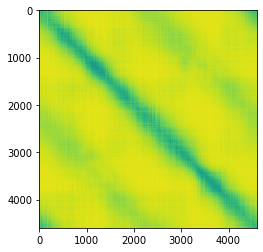

In [131]:
# Static Dissimilarity Matrix
plt.imshow(rdm_static_sel)

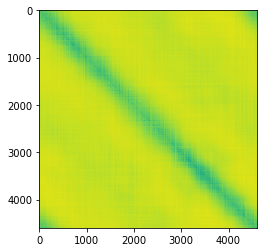

In [132]:
# Minnie Mouse Dissimilarity Matrix
plt.imshow(rdm_minnie_sel)

In [158]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

rdm_static_sel_std = StandardScaler().fit_transform(rdm_static_sel)
rdm_minnie_sel_std = StandardScaler().fit_transform(rdm_minnie_sel)

lm = LinearRegression()
lm.fit(rdm_static_sel_std, stim_intersect)

mlp = MLPRegressor(solver='lbfgs',activation= 'tanh' , alpha=1e-5, hidden_layer_sizes=(20,1), random_state=1, max_iter = 1e4)
mlp.fit(rdm_static_sel_std, stim_intersect)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 1), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000.0,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Linear Regression R^2:
-317.8729841717563


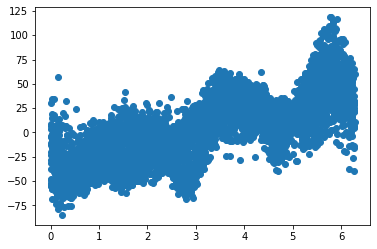

In [160]:
# for some reason the scale here is very off, so needs debugging

print("Linear Regression R^2:")
print(lm.score(rdm_minnie_sel_std, stim_intersect))
plt.scatter(y=lm.predict(rdm_minnie_sel_std), x=stim_intersect)

0.19272265135623978


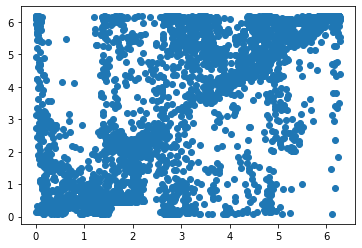

In [161]:
print(mlp.score(rdm_minnie_sel_std, stim_intersect))
plt.scatter(y=mlp.predict(rdm_minnie_sel_std), x=stim_intersect)